In [1]:
import sys, os
import numpy as np
import scipy.spatial.distance

import pandas as pd

import PIL.Image

import matplotlib.pyplot as plt

project_root = '/user_data/mmhender/featsynth/'
ecoset_info_path = '/user_data/mmhender/stimuli/ecoset_info/'

sys.path.append('/user_data/mmhender/featsynth/texture_synthesis/code/')
import utilities
# from image_analysis_morecode import extract_resnet_features

In [2]:
import choose_extra_ecoset_ims

choose_extra_ecoset_ims.choose_best_ecoset_ims()

/user_data/mmhender/featsynth/features/clip/images_things64_clip_embed.npy
/user_data/mmhender/featsynth/features/raw/images_things64_list.csv
/user_data/mmhender/featsynth/features/clip/images_ecoset64_clip_embed.npy
/user_data/mmhender/featsynth/features/raw/images_ecoset64_list.csv
beetle: detected 1 duplicates with things, skipping these
beetle: detected 1 duplicates within ecoset, skipping these
bee: detected 1 duplicates within ecoset, skipping these
butterfly: detected 2 duplicates within ecoset, skipping these
butterfly: detected 2 bad images, skipping these
grasshopper: detected 1 duplicates with things, skipping these
ant: detected 1 bad images, skipping these
moth: detected 1 duplicates with things, skipping these
moth: detected 2 bad images, skipping these
mosquito: detected 3 duplicates within ecoset, skipping these
mosquito: detected 12 bad images, skipping these
pea: detected 3 bad images, skipping these
corn: detected 1 duplicates within ecoset, skipping these
pumpkin: 

In [3]:
# info about ecoset categories
fn = os.path.join(ecoset_info_path, 'categ_use_ecoset.npy')
info = np.load(fn, allow_pickle=True).item()
bnames = list(info['binfo'].keys())

fn = '/user_data/mmhender/featsynth/features/raw/images_comb64_list.csv'

labels_all = pd.read_csv(fn)


In [4]:
bi = 48


bname = bnames[bi]
    
labs = labels_all.iloc[np.array(labels_all['basic_name']==bname)]
    

imfns = np.array(labs['image_filename'])[12:]
imfns = [fn.split('/Ecoset/')[1] for fn in imfns]
imdict = {}
for ii in np.arange(12,40):
    imdict[ii] = imfns[ii-12]
imdict

{12: 'train/0062_table/n03201208_9545.JPEG',
 13: 'train/0062_table/n03201208_22257.JPEG',
 14: 'train/0062_table/n03063968_8815.JPEG',
 15: 'train/0062_table/n03063968_8257.JPEG',
 16: 'train/0062_table/n04379243_487.JPEG',
 17: 'train/0062_table/n03063968_9203.JPEG',
 18: 'train/0062_table/n04379243_7144.JPEG',
 19: 'train/0062_table/bing_table_0008.jpg',
 20: 'train/0062_table/n04379243_19394.JPEG',
 21: 'train/0062_table/n03063968_5468.JPEG',
 22: 'train/0062_table/bing_table_0155.jpg',
 23: 'train/0062_table/n03063968_3693.JPEG',
 24: 'train/0062_table/bing_table_0136.jpg',
 25: 'train/0062_table/bing_table_0273.jpg',
 26: 'train/0062_table/n03063968_1630.JPEG',
 27: 'train/0062_table/flickr_table_0085.jpg',
 28: 'train/0062_table/flickr_table_0438.jpg',
 29: 'train/0062_table/n03063968_11617.JPEG',
 30: 'train/0062_table/n03063968_8368.JPEG',
 31: 'train/0062_table/n03063968_346.JPEG',
 32: 'train/0062_table/n04379243_5549.JPEG',
 33: 'train/0062_table/flickr_table_0254.jpg',
 34

Text(0.5, 0.98, 'table')

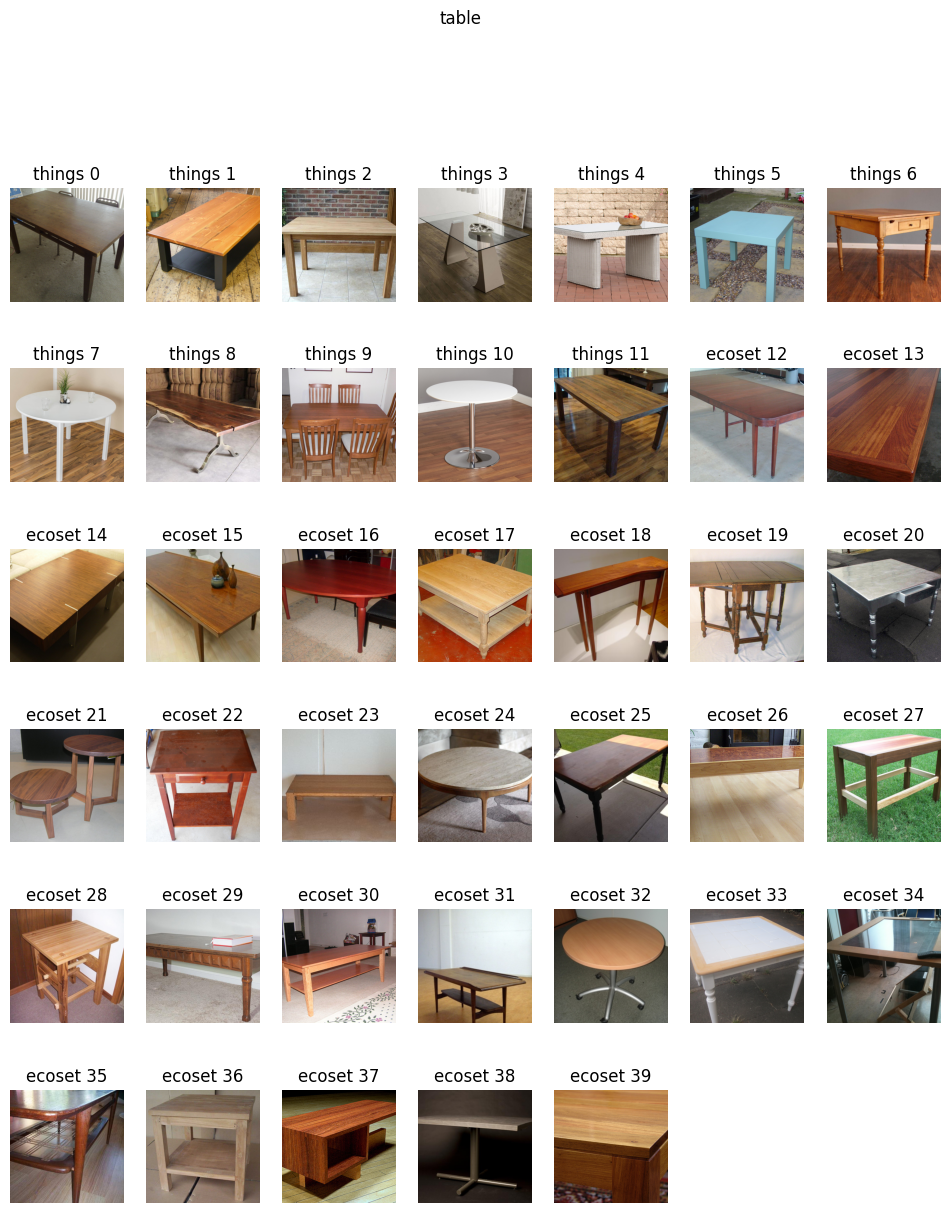

In [5]:

bi = 48

bname = bnames[bi]

labs = labels_all.iloc[np.array(labels_all['basic_name']==bname)]

plt.figure(figsize=(12, 16))

pi = 0

for ii in np.arange(0, 40):

    target_image_filename = np.array(labs['image_filename'])[ii]

    im = utilities.preprocess_image_tosave(
            utilities.load_image(target_image_filename)
        )
    # im = PIL.Image.open(target_image_filename)

    pi+=1
    plt.subplot(7, 7, pi)

    plt.imshow(im)
    plt.axis('off')

    plt.title('%s %d'%(np.array(labs['orig_set'])[ii], ii))

plt.suptitle(bname)
    

In [7]:
image_set_name2 = 'images_ecoset64'
image_list_filename2 = os.path.join(project_root, 'features','raw', '%s_list.csv'%(image_set_name2))
print(image_list_filename2)
labels_ecoset = pd.read_csv(image_list_filename2, index_col=0)

/user_data/mmhender/featsynth/features/raw/images_ecoset64_list.csv


In [8]:
labels_ecoset

super_name  super_index basic_name  basic_index image_type  \
0         insect            0     beetle            0       orig   
1         insect            0     beetle            0       orig   
2         insect            0     beetle            0       orig   
3         insect            0     beetle            0       orig   
4         insect            0     beetle            0       orig   
...          ...          ...        ...          ...        ...   
31995    vehicle            7      canoe           63       orig   
31996    vehicle            7      canoe           63       orig   
31997    vehicle            7      canoe           63       orig   
31998    vehicle            7      canoe           63       orig   
31999    vehicle            7      canoe           63       orig   

       exemplar_number                                     image_filename  
0                    0  /lab_data/tarrlab/common/datasets/Ecoset/train...  
1                    1  /lab_data/tarrlab/common/datasets/Ecoset/train...  
2                    2  /lab_data/tarrlab/common/datasets/Ecoset/train...  
3                    3  /lab_data/tarrlab/common/datasets/Ecoset/train...  
4                    4  /lab_data/tarrlab/common/datasets/Ecoset/train...  
...                ...                                                ...  
31995              495  /lab_data/tarrlab/common/datasets/Ecoset/train...  
31996              496  /lab_data/tarrlab/common/datasets/Ecoset/train...  
31997              497  /lab_data/tarrlab/common/datasets/Ecoset/train...  
31998              498  /lab_data/tarrlab/common/datasets/Ecoset/train...  
31999              499  /lab_data/tarrlab/common/datasets/Ecoset/train...  

[32000 rows x 7 columns]

Text(0.5, 0.98, 'trumpet')

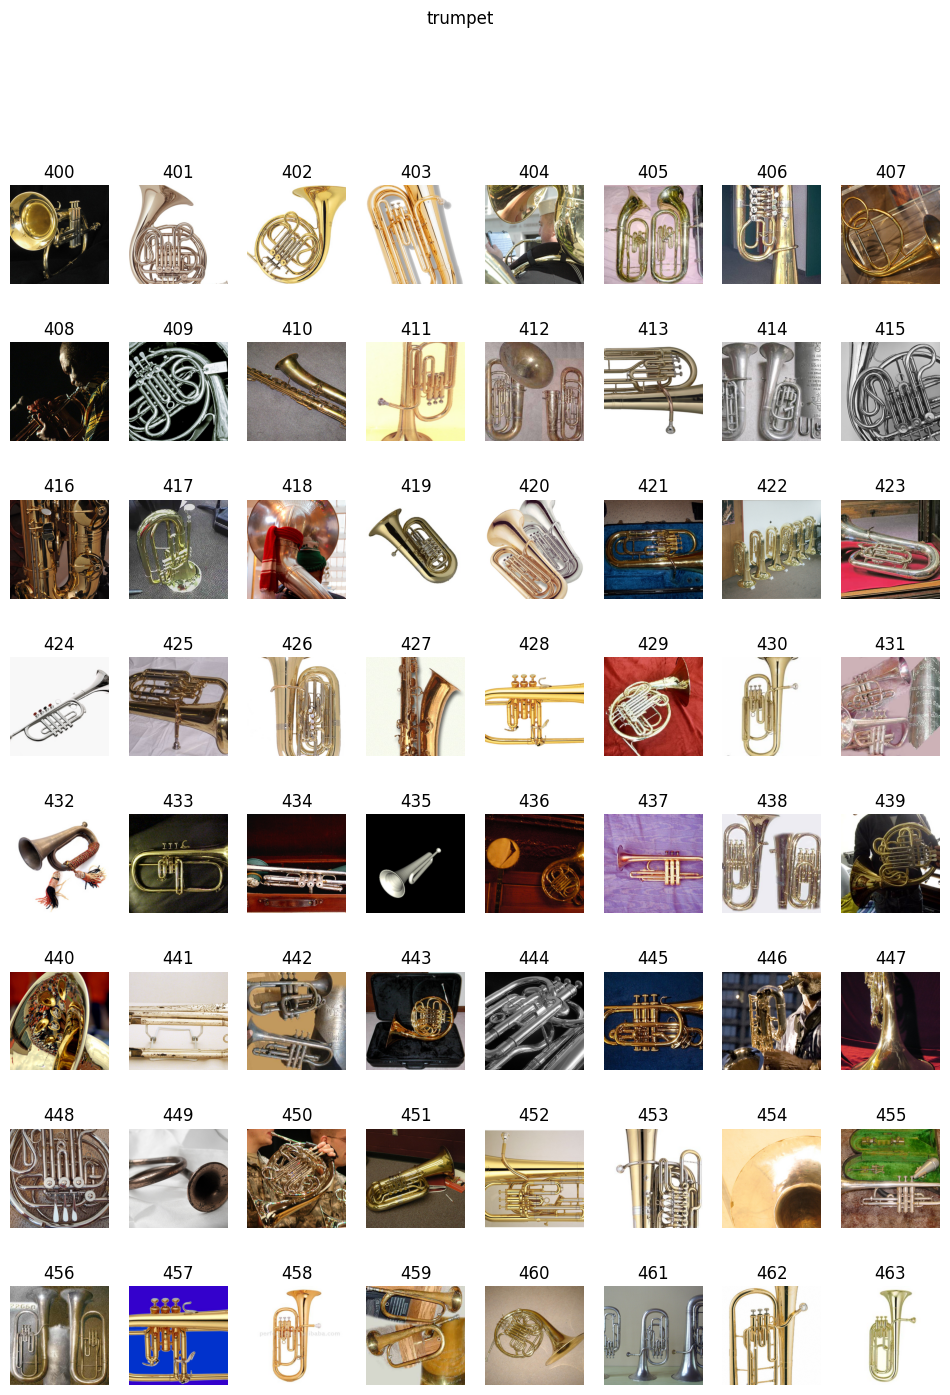

In [10]:

bi = 45

bname = bnames[bi]

labs = labels_ecoset.iloc[np.array(labels_ecoset['basic_name']==bname)]

plt.figure(figsize=(12, 16))

pi = 0

for ii in np.arange(400, 464):

    target_image_filename = np.array(labs['image_filename'])[ii]

    im = utilities.preprocess_image_tosave(
            utilities.load_image(target_image_filename)
        )
    # im = PIL.Image.open(target_image_filename)

    pi+=1
    plt.subplot(8,8, pi)

    plt.imshow(im)
    plt.axis('off')

    plt.title(ii)

plt.suptitle(bname)
    

/lab_data/tarrlab/common/datasets/Ecoset/train/1307_bugle/n03110669_21012.JPEG


(-0.5, 255.5, 255.5, -0.5)

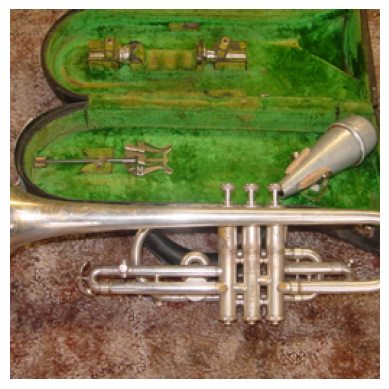

In [11]:
ii  =455

target_image_filename = np.array(labs['image_filename'])[ii]

print(target_image_filename)

im = utilities.preprocess_image_tosave(
        utilities.load_image(target_image_filename)
    )

plt.figure()
plt.imshow(im)
plt.axis('off')

train/0062_table/n03063968_7903.JPEG


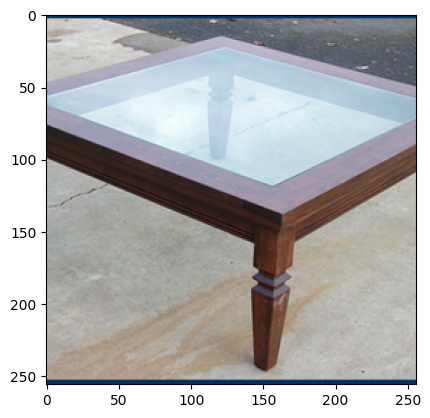

In [9]:
bi = 48

bname = bnames[bi]

labs = labels_all.iloc[np.array(labels_all['basic_name']==bname)]
ii = 22



target_image_filename = np.array(labs['image_filename'])[ii]

im = utilities.preprocess_image_tosave(
        utilities.load_image(target_image_filename)
    )

plt.figure()
plt.imshow(im)

print(target_image_filename.split('Ecoset/')[1])

In [10]:
target_image_filename

'/lab_data/tarrlab/common/datasets/Ecoset/train/0875_broom/n02906734_21374.JPEG'

train/0875_broom/n02906734_4655.JPEG


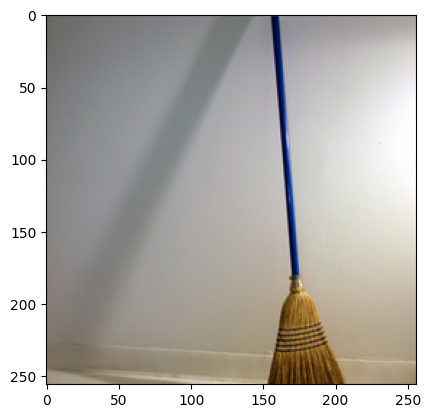

In [11]:
target_image_filename = '/lab_data/tarrlab/common/datasets/Ecoset/train/0875_broom/n02906734_4655.JPEG'


im = utilities.preprocess_image_tosave(
        utilities.load_image(target_image_filename)
    )

plt.figure()
plt.imshow(im)

print(target_image_filename.split('Ecoset/')[1])

In [9]:
sys.path.append('/user_data/mmhender/featsynth/texture_synthesis/code/')
import utilities, segmentation_utils

bi = 11;

bname = bnames[bi]

labs = labels_all.iloc[np.array(labels_all['basic_name']==bname)]

ii = 30;

filename = np.array(labs['image_filename'])[ii]

im = PIL.Image.open(filename)

print('orig size: %d by %d'%(im.size[0], im.size[1]))

import copy
imdat = copy.deepcopy(np.array(im))

# crop to a square (if not already square)
# this always takes center of the longer side
imdat_cropped, bbox = segmentation_utils.crop_to_square(imdat)

# back to PIL format
im_cropped = PIL.Image.fromarray(imdat_cropped.astype(np.uint8))

print('size after crop: %d by %d'%(im_cropped.size[0], im_cropped.size[1]))

assert(im_cropped.size[0]==im_cropped.size[1])
# im_resized = im.resize([n_pix, n_pix], resample=PIL.Image.BILINEAR)
im_resized = im_cropped.resize([n_pix, n_pix], resample=PIL.Image.Resampling.LANCZOS)

if im_resized.mode!='RGB':
    im_resized = im_resized.convert('RGB')

plt.figure()
plt.imshow(im)

plt.figure()
plt.imshow(im_resized)

orig size: 500 by 343
size after crop: 343 by 343


NameError: name 'n_pix' is not defined

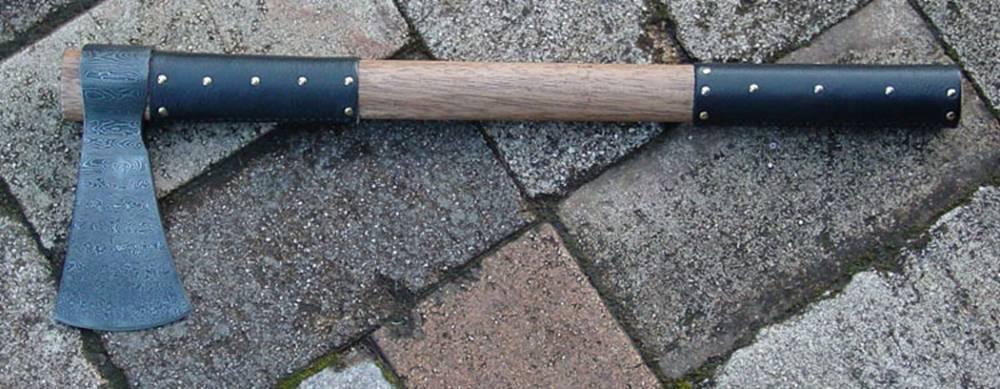

In [19]:
im

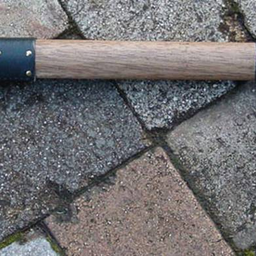

In [20]:
im_resized

In [10]:
folder_save = os.path.join(project_root, 'features','raw')

image_data_filename = os.path.join(folder_save, 'images_ecoset64_preproc.npy')

In [ ]:
ims = np.load(image_data_filename);

train/0215_axe/n02811468_687.JPEG


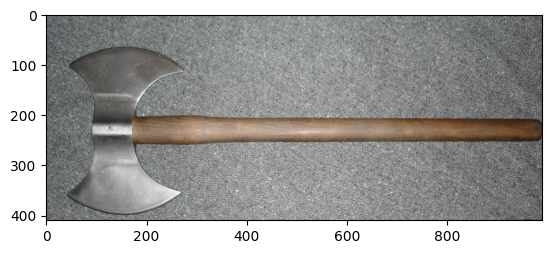

In [6]:
bi = 34;

bname = bnames[bi]

labs = labels_all.iloc[np.array(labels_all['basic_name']==bname)]

ii = 22;

# target_image_filename = '/lab_data/tarrlab/common/datasets/Ecoset/train/0174_knife/n03624400_2362.JPEG'
target_image_filename = np.array(labs['image_filename'])[ii]

im = PIL.Image.open(target_image_filename)

plt.figure()
plt.imshow(im)

print(target_image_filename.split('Ecoset/')[1])

In [5]:
target_image_filename

'/lab_data/tarrlab/common/datasets/Ecoset/train/1551_coconut/n07772935_36305.JPEG'

In [19]:
# these are a list of any images that have issues
# usually this is something like an artificial border
# or graphic that makes it look un-natural. 
ecoset_ims_exclude = ['train/1076_ant/n02220518_4413.JPEG']

In [20]:
target_image_filename.split('Ecoset/')[1]

'train/1076_ant/n02220518_4413.JPEG'

In [ ]:
ecse

In [7]:
orig_fn  = '/user_data/mmhender/stimuli/things/Images/clarinet/clarinet_06s.jpg'

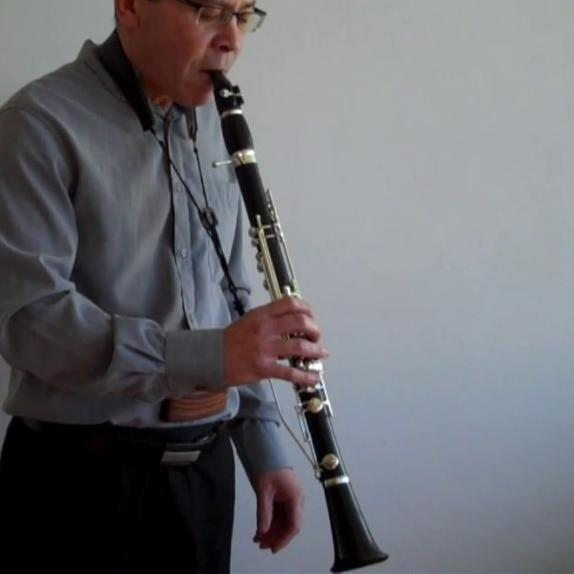

In [20]:
orig_im = PIL.Image.open(orig_fn)
orig_im

In [22]:
imdat = np.reshape(orig_im.getdata(), [orig_im.size[0], orig_im.size[1], 3])

In [26]:
orig_im.size

(574, 574)

In [30]:
imdat_cropped = imdat[80:, 80:,:]

In [31]:
im_cropped = PIL.Image.fromarray(imdat_cropped.astype(np.uint8))

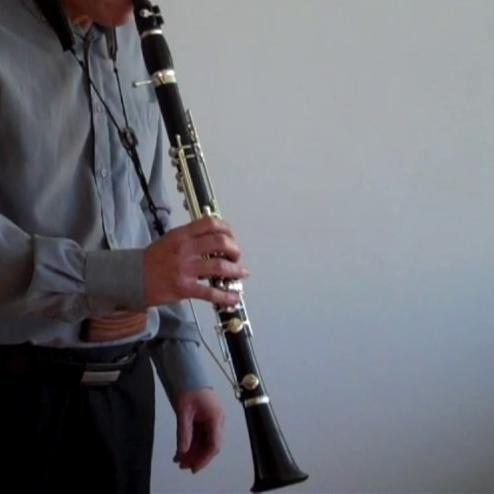

In [32]:
im_cropped

In [40]:
new_fn = '/user_data/mmhender/stimuli/things/Images/clarinet/clarinet_cropped_06s.jpg'

In [41]:
im_cropped.save(new_fn)

In [43]:
things_stim_path = '/user_data/mmhender/stimuli/things/'
concept = 'clarinet'
files = os.listdir(os.path.join(things_stim_path, 'Images', concept))

In [44]:
files = [f for f in files if '.jpg' in f]
files = np.sort(files)

In [45]:
files

array(['clarinet_01b.jpg', 'clarinet_02n.jpg', 'clarinet_03s.jpg',
       'clarinet_04s.jpg', 'clarinet_05n.jpg', 'clarinet_06s.jpg',
       'clarinet_06s_cropped.jpg', 'clarinet_07n.jpg', 'clarinet_08s.jpg',
       'clarinet_09s.jpg', 'clarinet_10s.jpg', 'clarinet_11s.jpg',
       'clarinet_12s.jpg', 'clarinet_13s.jpg', 'clarinet_cropped_06s.jpg'],
      dtype='<U24')

In [4]:
import numpy as np

tfiles = np.load('/user_data/mmhender/stimuli/things/things_file_info.npy', allow_pickle=True).item()
tfiles['clarinet']

array(['clarinet_01b.jpg', 'clarinet_02n.jpg', 'clarinet_03s.jpg',
       'clarinet_04s.jpg', 'clarinet_05n.jpg', 'clarinet_06s.jpg',
       'clarinet_07n.jpg', 'clarinet_08s.jpg', 'clarinet_09s.jpg',
       'clarinet_10s.jpg', 'clarinet_11s.jpg', 'clarinet_12s.jpg',
       'clarinet_13s.jpg', 'clarinet_cropped_06s.jpg'], dtype='<U24')

In [1]:
import sys

sys.path.append('/user_data/mmhender/featsynth/code/')
sys.path.insert(0, '/user_data/mmhender/featsynth/code/')

from utils import things_utils

things_utils.get_things_files()

saving to /user_data/mmhender/stimuli/things/things_file_info.npy
